## Домашнее задание 3 (10 баллов)

## НИУ ВШЭ, 2024-25 учебный год

## Формат сдачи

Сам ноутбук называйте в формате hw-03-USERNAME.ipynb, где USERNAME — ваши фамилия и имя. Файл надо будет сдать в anytask.

## О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn, а также познакомитесь с plotly.

EDA - важный этап работы с данными. Именно в процессе EDA вы можете выяснить особенности датасета, найти зависимости в данных, протестировать гипотезы о взаимосвязях признаков и целевой переменной. В реальности вы сами будете определять, что и как проверять в рамках EDA, однако в данной работе гипотезы будут выдвинуты за вас автором задания. Также и типы графиков, которые вы будете использовать уже предопределены за вас. Выполняя задания по визуализациям, обращайте внимание на референсные картинки, которые были оставлены авторами. Они показывают, какой примерно результат от вас ожидается.

Это задание будет включать в себя построение некоторого количества графиков, потому вот основные правила, в соответствии с которыми графики должны быть оформлены:
1. Любой график всегда имеет название.
2. Оси у графика подписаны (исключение - график делит название оси с соседним).
3. Подписи делаются на одном языке (либо английский, либо русский), но не на их смеси.
4. Если вы выводите несколько графиков, то они размещаются в рамках одного объекта matplotlib.pyplot.figure. Вы не выводите графики последовательно, а смотрите, как их разместить сразу все за раз.
5. Отдельные графики (если графиков на картинке больше 1) также имеют свои названия.
6. Если на графике есть несколько различных объектов, то для их различения используется легенда. Помещайте легенду в место, где она в наименьшей мере мешает восприятию самого графика.
7. Если есть легенда, то она должна иметь навание, а также ее содержание должно быть адекватными (пожалейте проверяющих, они не хотят разбирать, а к чему относится зеленая линия, которая на легенде помечена меткой "0").
8. Используйте цветовые гаммы, чтобы объекты на графиках отличались цветом.
9. Текст на визуализации должен быть читаем. Если вы вывели названия категорий в качестве подписей на оси Х, а эти названия наезжают друг на друга, то вам нужно что-то с этим сделать. Нечитаемый или плохо читаемый (очень маленький, невероятно огромный) текст ведет к снижению баллов.

При работе с табличными данными используйте функционал [style](https://pandas.pydata.org/docs/user_guide/style.html#Builtin-Styles), чтобы визуально выделять необходимые элементы.

В этом задании будут оцениваться ваши развернутые комментарии, размышления и выводы (по построенным графикам): не скупитесь на них, но следите, чтобы выводы не были поверхностными и очевидными.

*Тут правило про плагиат, которое вам итак известно - обнуляются все работы, которые подозреваются в некорректных заимствованиях!* Помните, что просто скопировать код из интернета и указать источник - это не ваша самостоятельная работа, а автора кода. Измените хоть что-нибудь в коде.

## О данных

Будем работать с [датасетом физической активности](https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones).

В этом датасете собраны данные 30 человек, выполняющих различные действия со смартфоном на поясе. Данные записывались с помощью датчиков (акселерометра и гироскопа) в этом смартфоне. Были зафиксированы: "3-осевое линейное ускорение" (_tAcc-XYZ_) и "3-осевая угловая скорость" (_tGyro-XYZ_).

1. Все сигналы отсортированы по времени, пропущены через фильтр шума.
2. Все наблюдения были разделены на окна по 128 сигналов в каждом, причем окна пересекаются на 50% (грубо говоря, с 1 по 128 сигнал в 1 окно, с 64 до 192 сигнала - во 2 окно и так далее). То есть каждое окно покрывает 2.56 секунды данных (два шага человека при ходьбе, учитывая медленную походку пожилых людей).
3. Линейное ускорение было разделено на две составляющие (с помощью низкочастотного фильтра): ускорение самого тела, а также гравитационная составляющая. Будем называть их ускорением тела и гравитационным ускорением.
4. К получившимся окнам применяли различные функции для получения следующих показателей:
    - max
    - min
    - mad (median)
    - mean
    - std
    - skewness (коэффициент асимметричности распределения признака в окне)
    - etc. (подробнее, на сколько это возможно, указано в [самой статье](https://www.esann.org/sites/default/files/proceedings/legacy/es2013-84.pdf))
5. Величина (magnitude) сигнала также определялась через евклидову норму всех значений из вектора для одного окна.
6. К окнам было применено преобразование Фурье, чтобы получить частоты. Из частот были извелченыте же показатели, плюс новые:
    - bandsEnergy (энергия частотного интервала)
7. Были посчитаны углы между векторами соответствующих окон.
8. Для ускорений были посчитаны производные - рывки, к которым применялись те же функции.

Итог: в датасете каждый признак - это какая-то операция над вектором из 128 чисел, которые соответствуют замерам определенного человека занятого какой-то активностью на протяжении 2.56 секунд.

Как читать названия признаков? Примеры:
- `tBodyAccMag-mean()` - это вектор ускорений тела (без гравитационной составляющей этого ускорения), из которого взяли евклидову норму, а затем усреднили, чтобы получить скаляр
- `fBodyAcc-bandsEnergy()-1,8.2` - это вектор ускорения тела, к которому применили преобразование Фурье, преобразовав его в вектор частот, а затем посчитали на этом векторе энергию данного частотного интервала в определенном диапазоне частот (в данном случае 1 - 8.2)
- `angle(X,gravityMean)` - это угол между осью Х и вектором усредненных значений гравитационного ускорения из соответствующего окна

Вероятно, сначала покажется сложным, но мы разберемся с некоторыми признаками в отдельности и вы сможете понять их смысл, уже исходя из фактических соотношений.

## Предобработка данных

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv("test.csv")

In [5]:
train.shape

(7352, 563)

В датасете 563 признака, включая целевую переменную. Столько признаков нам не нужно. Мы за вас сделали подвыборку признаков для удобства работы с ними.

In [7]:
cols_subset = [
    'tBodyAccMag-mean()',  # усредненная величина ускорения тела
    'tBodyGyroJerk-mad()-X',  # медианная величина рывка тела по оси Х
    'tGravityAcc-min()-X',  # минимум гравитационной составляющей ускорения по оси Х
    'tBodyAcc-max()-X',  # максимальная величина ускорения тела по оси Х
    'fBodyAcc-bandsEnergy()-1,8.2',  # энергия ускорения тела в интервале частоты
    'angle(X,gravityMean)',  # угол между осью Х и усредненной гравитационной составляющей ускорения
    'angle(Y,gravityMean)',  # угол между осью Y и усредненной гравитационной составляющей ускорения
    'angle(Z,gravityMean)',  # угол между осью Z и усредненной гравитационной составляющей ускорения,
    'fBodyAcc-skewness()-X',  # асимметричность частоты ускорения тела по оси Х
    'subject',  # номер испытуемого
    'Activity',  # название вида деятельности (целевая переменная)
]

In [8]:
train = train[cols_subset]
test = test[cols_subset]

### Задание 1 (0.5 балла)

Посмотрите на пропуски и дубли в данных train и test. Есть ли они? Если есть, напишите, с чем это может быть связано? Если нет, то просто напишите, что пропусков и/или дублей нет.

In [814]:
train_empty = train.isna().sum().sum()
train_duplicates = train.duplicated().sum()

print(f"Sum of empty values in train: {train_empty}")
print(f"Sum of duplicates values in train: {train_duplicates}")

Sum of empty values in train: 0
Sum of duplicates values in train: 0


In [815]:
test_empty = test.isna().sum().sum()
test_duplicates = test.duplicated().sum()

print(f"Sum of empty values in test: {test_empty}")
print(f"Sum of duplicates values in test: {test_duplicates}")

Sum of empty values in test: 0
Sum of duplicates values in test: 0


Пропусков и дублей нет.

### Задание 2 (0.5 балла)

Выведите основные статистики данных: среднее, медиана, перцентили (0.25, 0.5, 0.75), минимум, максимум, стандартное отклонение. Посмотрите на таблицу и напишите, видите ли вы в ней что-нибудь интересное.

In [816]:
train.describe()

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  tGravityAcc-min()-X  \
count         7352.000000            7352.000000          7352.000000   
mean            -0.543884              -0.727735             0.678505   
std              0.477653               0.315832             0.508656   
min             -1.000000              -0.999889            -1.000000   
25%             -0.983282              -0.991595             0.804270   
50%             -0.883371              -0.950268             0.926693   
75%             -0.106892              -0.474625             0.965095   
max              1.000000               1.000000             1.000000   

       tBodyAcc-max()-X  fBodyAcc-bandsEnergy()-1,8.2  angle(X,gravityMean)  \
count       7352.000000                   7352.000000           7352.000000   
mean          -0.468604                     -0.847963             -0.489547   
std            0.544547                      0.233633              0.511807   
min           -1.000000                     -1.000000             -1.000000   
25%           -0.936219                     -0.999480             -0.812065   
50%           -0.881637                     -0.986582             -0.709417   
75%           -0.017129                     -0.764508             -0.509079   
max            1.000000                      1.000000              1.000000   

       angle(Y,gravityMean)  angle(Z,gravityMean)  fBodyAcc-skewness()-X  \
count           7352.000000           7352.000000            7352.000000   
mean               0.058593             -0.056515              -0.128562   
std                0.297480              0.279122               0.403686   
min               -1.000000             -1.000000              -0.931208   
25%               -0.017885             -0.143414              -0.486841   
50%                0.182071              0.003181              -0.163271   
75%                0.248353              0.107659               0.155112   
max                0.478157              1.000000               1.000000   

           subject  
count  7352.000000  
mean     17.413085  
std       8.975143  
min       1.000000  
25%       8.000000  
50%      19.000000  
75%      26.000000  
max      30.000000

Интересное:

1. Во всех признаках, кроме `andle(Y,gravityMean)` и `subject`, достигается максимальное значение 1.
2. Во всех признаках, кроме `tBodyGyroJerk-mad()-X`, `fBodyAcc-skewness()-X` и `subject`, достигается минимальное значение -1.
3. Везде медиана и среднее значение отличаются, поэтому можно предположить, что есть выбросы.
4. `tBodyAccMag-mean()` и `tBodyAcc-max()-X` имеют похожую характеристику.

In [817]:
test.describe()

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  tGravityAcc-min()-X  \
count         2947.000000            2947.000000          2947.000000   
mean            -0.559043              -0.735661             0.696878   
std              0.439539               0.282074             0.502873   
min             -0.998936              -1.000000            -0.756774   
25%             -0.978433              -0.989078             0.836787   
50%             -0.861830              -0.914698             0.934930   
75%             -0.149596              -0.486423             0.970871   
max              0.479547               0.117606             0.996148   

       tBodyAcc-max()-X  fBodyAcc-bandsEnergy()-1,8.2  angle(X,gravityMean)  \
count       2947.000000                   2947.000000           2947.000000   
mean          -0.462063                     -0.880361             -0.513923   
std            0.523916                      0.160496              0.509205   
min           -0.952357                     -0.999989             -0.984195   
25%           -0.934447                     -0.999330             -0.829722   
50%           -0.852659                     -0.979336             -0.729648   
75%           -0.009965                     -0.799113             -0.545939   
max            0.786436                      0.048730              0.833180   

       angle(Y,gravityMean)  angle(Z,gravityMean)  fBodyAcc-skewness()-X  \
count           2947.000000           2947.000000            2947.000000   
mean               0.074886             -0.048720              -0.154042   
std                0.324300              0.241467               0.392203   
min               -0.913704             -0.949228              -1.000000   
25%                0.022140             -0.098485              -0.497070   
50%                0.181563             -0.010671              -0.202050   
75%                0.260252              0.092373               0.140254   
max                1.000000              0.973113               0.960367   

           subject  
count  2947.000000  
mean     12.986427  
std       6.950984  
min       2.000000  
25%       9.000000  
50%      12.000000  
75%      18.000000  
max      24.000000

Интересное:
1. В отличие от тренировочных данных максимальные значения не достигают 1.
2. Минимальные значения также почти везде не достигают -1.
3. Перцентили почти не отличаются от значений тренировочных данных.

### Задание 3 (0.5 балла)

Данные сбалансированы? У вас есть 6 категорий активности (целевая переменная). Если одна из категорий представлена большим количеством наблюдений, а остальные - нет, то это обстоятельство, о котором хотелось бы знать заранее. Гиперболизированный пример: представьте, что у вас 1000 наблюдений, разделенных на два класса, и только 5 принадлежат ко второму классу. Как учить модель на такой выборке? Есть сильное подозрение, что многие модели будут склонны вырождаться в константу. Отсюда и необходимость проверять баланс классов.

Выведите количество наблюдений для всех категорий активности в train и test. Посчитайте разницу в процентах между самой крупной категорией и самой маленькой (самая большая категория - это 100%). Если разница (округленная до ближайшего целого числа) не превышает 30%, то давайте для наших целей считать, что данные сбалансированы. Напишите, сбалансированы ли данные в train и test.

In [818]:
train_activities = train["Activity"].value_counts()
train_activities.to_frame().reset_index()

Activity  count
0              LAYING   1407
1            STANDING   1374
2             SITTING   1286
3             WALKING   1226
4    WALKING_UPSTAIRS   1073
5  WALKING_DOWNSTAIRS    986

In [819]:
max_train_activity = train_activities.max()
min_train_activity = train_activities.min()
diff_train_activity = (max_train_activity - min_train_activity) / max_train_activity * 100
print(f"Difference between max and min in train data: {diff_train_activity}")

Difference between max and min in train data: 29.92181947405828


Разница - 29.9%, поэтому тренировочные данные сбалансированы.

In [820]:
test_activities = test["Activity"].value_counts()
test_activities.to_frame().reset_index()

Activity  count
0              LAYING    537
1            STANDING    532
2             WALKING    496
3             SITTING    491
4    WALKING_UPSTAIRS    471
5  WALKING_DOWNSTAIRS    420

In [821]:
max_test_activity = test_activities.max()
min_test_activity = test_activities.min()
diff_test_activity = (max_test_activity - min_test_activity) / max_test_activity * 100
print(f"Difference between max and min in test data: {diff_test_activity}")

Difference between max and min in test data: 21.787709497206702


Разница - 21.8%, поэтому тестовые данные сбалансированы.

### Задание 4 (0.5 балла)

Посчитайте корреляции всех признаков (включая таргет) со всеми другими. Какими получились значения? Есть идеи, почему так? Напишите ваши мысли.

Сначала преобразуем категориальные данные с помощью one-hot кодирования.

In [822]:
train_dum = pd.get_dummies(train, drop_first=True)
train_dum.head()

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  tGravityAcc-min()-X  \
0           -0.959434              -0.992165             0.977436   
1           -0.979289              -0.989876             0.984520   
2           -0.983703              -0.987868             0.986770   
3           -0.986542              -0.991241             0.986821   
4           -0.992827              -0.992882             0.987434   

   tBodyAcc-max()-X  fBodyAcc-bandsEnergy()-1,8.2  angle(X,gravityMean)  \
0         -0.934724                     -0.993592             -0.841247   
1         -0.943068                     -0.998235             -0.844788   
2         -0.938692                     -0.999388             -0.848933   
3         -0.938692                     -0.999807             -0.848649   
4         -0.942469                     -0.999806             -0.847865   

   angle(Y,gravityMean)  angle(Z,gravityMean)  fBodyAcc-skewness()-X  subject  \
0              0.179941             -0.058627               0.142051        1   
1              0.180289             -0.054317              -0.692541        1   
2              0.180637             -0.049118              -0.727227        1   
3              0.181935             -0.047663              -0.599118        1   
4              0.185151             -0.043892              -0.676997        1   

   Activity_SITTING  Activity_STANDING  Activity_WALKING  \
0             False               True             False   
1             False               True             False   
2             False               True             False   
3             False               True             False   
4             False               True             False   

   Activity_WALKING_DOWNSTAIRS  Activity_WALKING_UPSTAIRS  
0                        False                      False  
1                        False                      False  
2                        False                      False  
3                        False                      False  
4                        False                      False

In [823]:
train_dum.corr(method='pearson')

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  \
tBodyAccMag-mean()                      1.000000               0.899080   
tBodyGyroJerk-mad()-X                   0.899080               1.000000   
tGravityAcc-min()-X                     0.369962               0.380118   
tBodyAcc-max()-X                        0.959827               0.879900   
fBodyAcc-bandsEnergy()-1,8.2            0.697832               0.507939   
angle(X,gravityMean)                   -0.370849              -0.382246   
angle(Y,gravityMean)                    0.495561               0.478567   
angle(Z,gravityMean)                    0.426283               0.380967   
fBodyAcc-skewness()-X                   0.379796               0.266002   
subject                                -0.073652              -0.110321   
Activity_SITTING                       -0.396389              -0.379403   
Activity_STANDING                      -0.414460              -0.370699   
Activity_WALKING                        0.358825               0.531695   
Activity_WALKING_DOWNSTAIRS             0.561344               0.445048   
Activity_WALKING_UPSTAIRS               0.405434               0.257524   

                              tGravityAcc-min()-X  tBodyAcc-max()-X  \
tBodyAccMag-mean()                       0.369962          0.959827   
tBodyGyroJerk-mad()-X                    0.380118          0.879900   
tGravityAcc-min()-X                      1.000000          0.380404   
tBodyAcc-max()-X                         0.380404          1.000000   
fBodyAcc-bandsEnergy()-1,8.2             0.239088          0.613383   
angle(X,gravityMean)                    -0.988663         -0.384192   
angle(Y,gravityMean)                     0.797116          0.480229   
angle(Z,gravityMean)                     0.667415          0.405023   
fBodyAcc-skewness()-X                   -0.261676          0.335708   
subject                                 -0.042371         -0.055633   
Activity_SITTING                         0.187055         -0.387297   
Activity_STANDING                        0.262354         -0.399861   
Activity_WALKING                         0.234820          0.298526   
Activity_WALKING_DOWNSTAIRS              0.192409          0.658369   
Activity_WALKING_UPSTAIRS                0.159741          0.347429   

                              fBodyAcc-bandsEnergy()-1,8.2  \
tBodyAccMag-mean()                                0.697832   
tBodyGyroJerk-mad()-X                             0.507939   
tGravityAcc-min()-X                               0.239088   
tBodyAcc-max()-X                                  0.613383   
fBodyAcc-bandsEnergy()-1,8.2                      1.000000   
angle(X,gravityMean)                             -0.213318   
angle(Y,gravityMean)                              0.363170   
angle(Z,gravityMean)                              0.423927   
fBodyAcc-skewness()-X                             0.260316   
subject                                          -0.037000   
Activity_SITTING                                 -0.276766   
Activity_STANDING                                -0.296141   
Activity_WALKING                                  0.189834   
Activity_WALKING_DOWNSTAIRS                       0.217399   
Activity_WALKING_UPSTAIRS                         0.534750   

                              angle(X,gravityMean)  angle(Y,gravityMean)  \
tBodyAccMag-mean()                       -0.370849              0.495561   
tBodyGyroJerk-mad()-X                    -0.382246              0.478567   
tGravityAcc-min()-X                      -0.988663              0.797116   
tBodyAcc-max()-X                         -0.384192              0.480229   
fBodyAcc-bandsEnergy()-1,8.2             -0.213318              0.363170   
angle(X,gravityMean)                      1.000000             -0.783848   
angle(Y,gravityMean)                     -0.783848              1.000000   
angle(Z,gravityMean)                     -0.643655              0.594885   
fBodyAcc-skewne

1. `tBodyAccMag-mean()`, `tBodyGyroJerk-mad()-X` и `tBodyAcc-max()-X` имеют близкую к 1 по модулю корреляцию, так как они несут в себе примерно одинаковую информацию (среднее ускорение, максимальное ускорение, медианный рывок). 
2. `angle(X,gravityMean)` и `tGravityAcc-min()-X` также имеют корреляцию близкую к -1, потому что чем больше гравитационная составляющая, тем меньше угол по оси X, т.е. если человек покоится (лежит), то его гравитация больше.
3. Многие признаки у `Activity_SITTING` и `Activivty_STANDING` имеют противоположные значения с другими активностями, потому что при сидении и стоянии человек почти не двигается, а в других активностях зайдствовано больше действий.
4. `subject` со всеми признаками почти никак не коррелирует, потому что это всего лишь номер испытуемого - почти бесполезная информация. 

Поздравляем! Вы предобработали данные для максимально комфортного их последующего анализа. Теперь вы готовы приступить к Exploratory Data Analysis!

## Exploratory Data Analysis

### Задание 5 (0.5 балла)

Вы проверили основную информацию о данных и составили свое первое впечатление о них. Теперь визуализации.

Начнем рисовать графики с небольшой разминки. Выберите две любые математические функции (отличные от линейной) и нарисуйте их на одном графике. Подпишите каждый из графиков, чтобы было понятно, какие функции вы выбрали. Ниже будет пример.

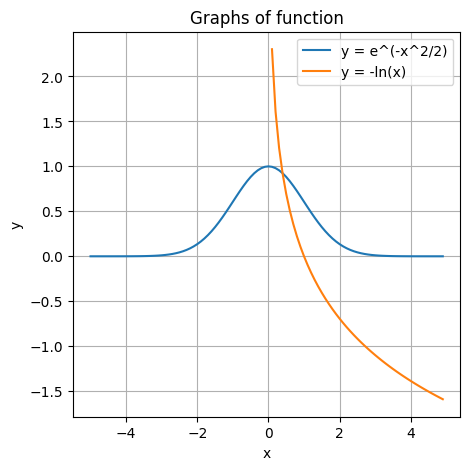

In [824]:
x = np.arange(-5, 5, 0.1)
plt.figure(figsize=(5, 5))

plt.plot(x, np.exp(-x**2 / 2), label='y = e^(-x^2/2)')
plt.plot(x, -np.log(x), label='y = -ln(x)')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title("Graphs of function")
plt.grid()

### Задание 6 (0.5 балла)

Ранее мы уже проверили сбалансированность данных по разным категориям активностей в train и test сетах. Теперь визуализируйте количество сэмплов в каждой из категорий отдельно для train и test сетов, как в примере ниже. Проследите, чтобы порядок категорий слева и справа был одинаков. Иначе не очень удобно их сравнивать (когда они в разных местах двух графиков). Также заметьте, что в примере ось Х в одинаковом масштабе, что тоже удобно для сравнения.

Вам может пригодиться:
- plt.barh или ax.barh

Сначала поменяем местами `WALKING` и `SITTING`, чтобы порядок активностей был одинаковый.

In [825]:
test_activities_frame = test["Activity"].value_counts().to_frame().reset_index()

temp = test_activities_frame.iloc[3].copy()
test_activities_frame.iloc[3] = test_activities_frame.iloc[2]
test_activities_frame.iloc[2] = temp
test_activities_frame

Activity  count
0              LAYING    537
1            STANDING    532
2             SITTING    491
3             WALKING    496
4    WALKING_UPSTAIRS    471
5  WALKING_DOWNSTAIRS    420

Преобразуем данные для графика и найдём максимальное значение данных, чтобы сделать ось X в одинаковом масштабе.

In [826]:
train_activities_frame = train_activities.to_frame().reset_index()

train_max_count_activity = train_activities_frame["count"].max()
test_max_count_activity = test_activities_frame["count"].max()

activity_max_count = np.max((train_max_count_activity, test_max_count_activity)) * 1.05

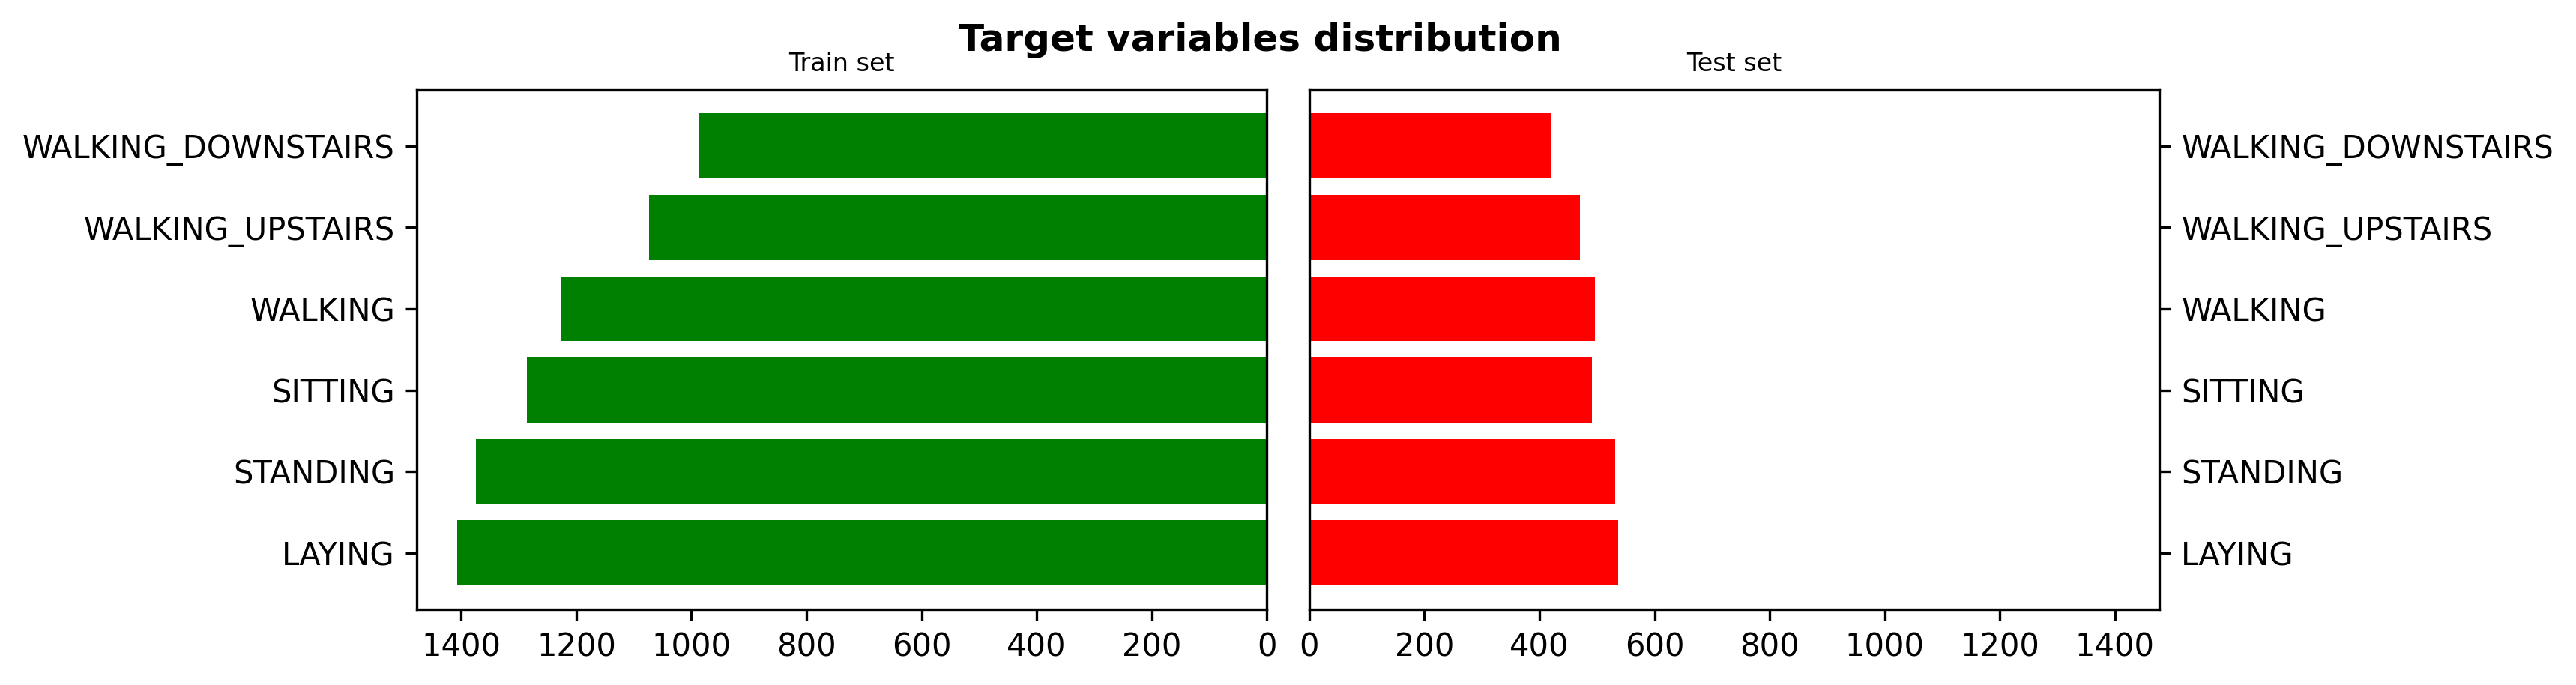

In [827]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3), dpi=300)


axs[0].set_title('Train set', size=8)
axs[0].barh(train_activities_frame["Activity"], train_activities_frame["count"], color='g')
axs[0].set_xlim((0, activity_max_count))
axs[0].invert_xaxis()

axs[1].set_title('Test set', size=8)
axs[1].barh(test_activities_frame["Activity"], test_activities_frame["count"], color='r')
axs[1].set_xlim((0, activity_max_count))
axs[1].yaxis.tick_right()

fig.suptitle("Target variables distribution", fontweight="bold")
fig.subplots_adjust(wspace=0.05)
fig.show()

Правда на таких графиках проще проверять баланс классов таргета?)

### Задание 7 (0.5 балла)

Ранее вы выводили таблицу корреляций. Однако просто таблица корреляций не очень удобна для анализа. Что, если признаков было бы больше? Визуализируйте heatmap корреляций. Подпишите значения корреляций, округленные до 2 знаков после запятой, на графике и оставьте только те значения, которые по модулю не меньше 0.5. Будем считать такие корреляции существенными. Если будете брать код из семинарского ноутбука, то поменяйте в нем что-нибудь, например, цветовую гамму, иначе проверяющий будет карать :)

Какой признак стоит исключить из рассмотрения корреляций? Напишите его название, а также причину, почему нет смысла его рассматривать.

Вам может пригодиться:
- sns.heatmap
- методы get_text и set_text у атрибута texts графика

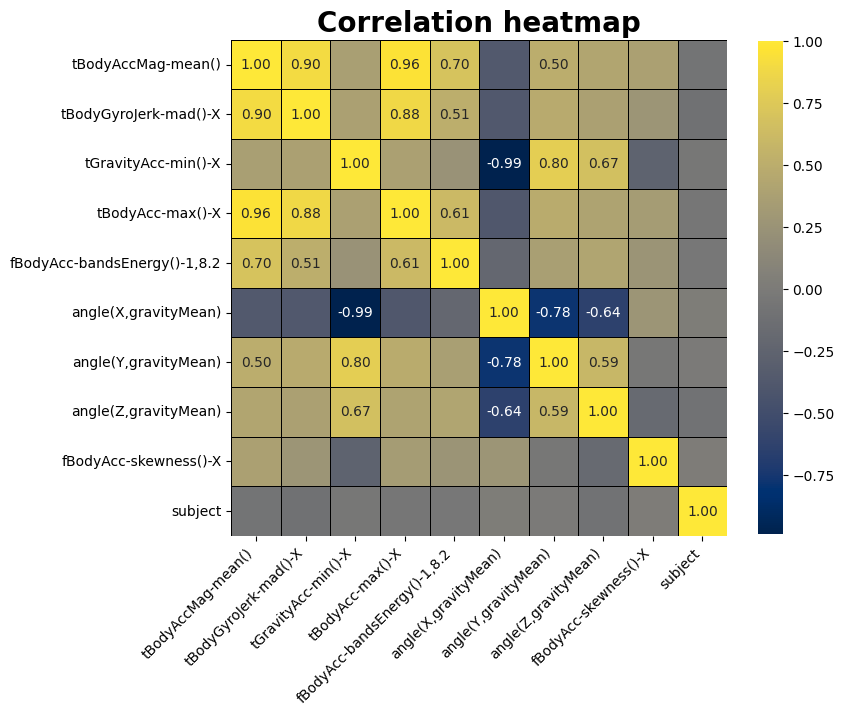

In [828]:
plt.figure(figsize=(8, 8), dpi=100)

ax = sns.heatmap(
    train.corr(numeric_only=True), 
    cmap="cividis", 
    annot=True, 
    fmt="0.2f",
    linewidths=0.5,
    linecolor='black',
    cbar_kws={"shrink": 0.8},
    square=True
)

for t in ax.texts:
    if np.abs(float(t.get_text())) < 0.5:
        t.set_text("")

plt.title("Correlation heatmap", fontsize=20, fontweight="bold")
plt.xticks(rotation=45, ha="right")
plt.show()

Исключить можно признак `subject`, потому что он не несёт в себе никакой информации, кроме номера испытуемого, а это просто порядковая переменная, и в реальности никак не отображает информацию об объекте. 

На признак асимметричности частоты ускорения тела по оси Х `fBodyAcc-skewness()-X` тоже можно особо не обращать внимание, потому что он слабо коррелирует с остальными признаками, скорее всего, из-за того, что данные симметричны.

### Задание 8 (0.5 балла)

Для начала будем стрелять из пушки по воробьям. Выведите pairplot по всем данным train сета. Напишите, заметили ли вы в нем что-нибудь интересное, чего не было в таблицах и графиках ранее, а также сообщите, было ли вам удобно анализировать 100 графиков.

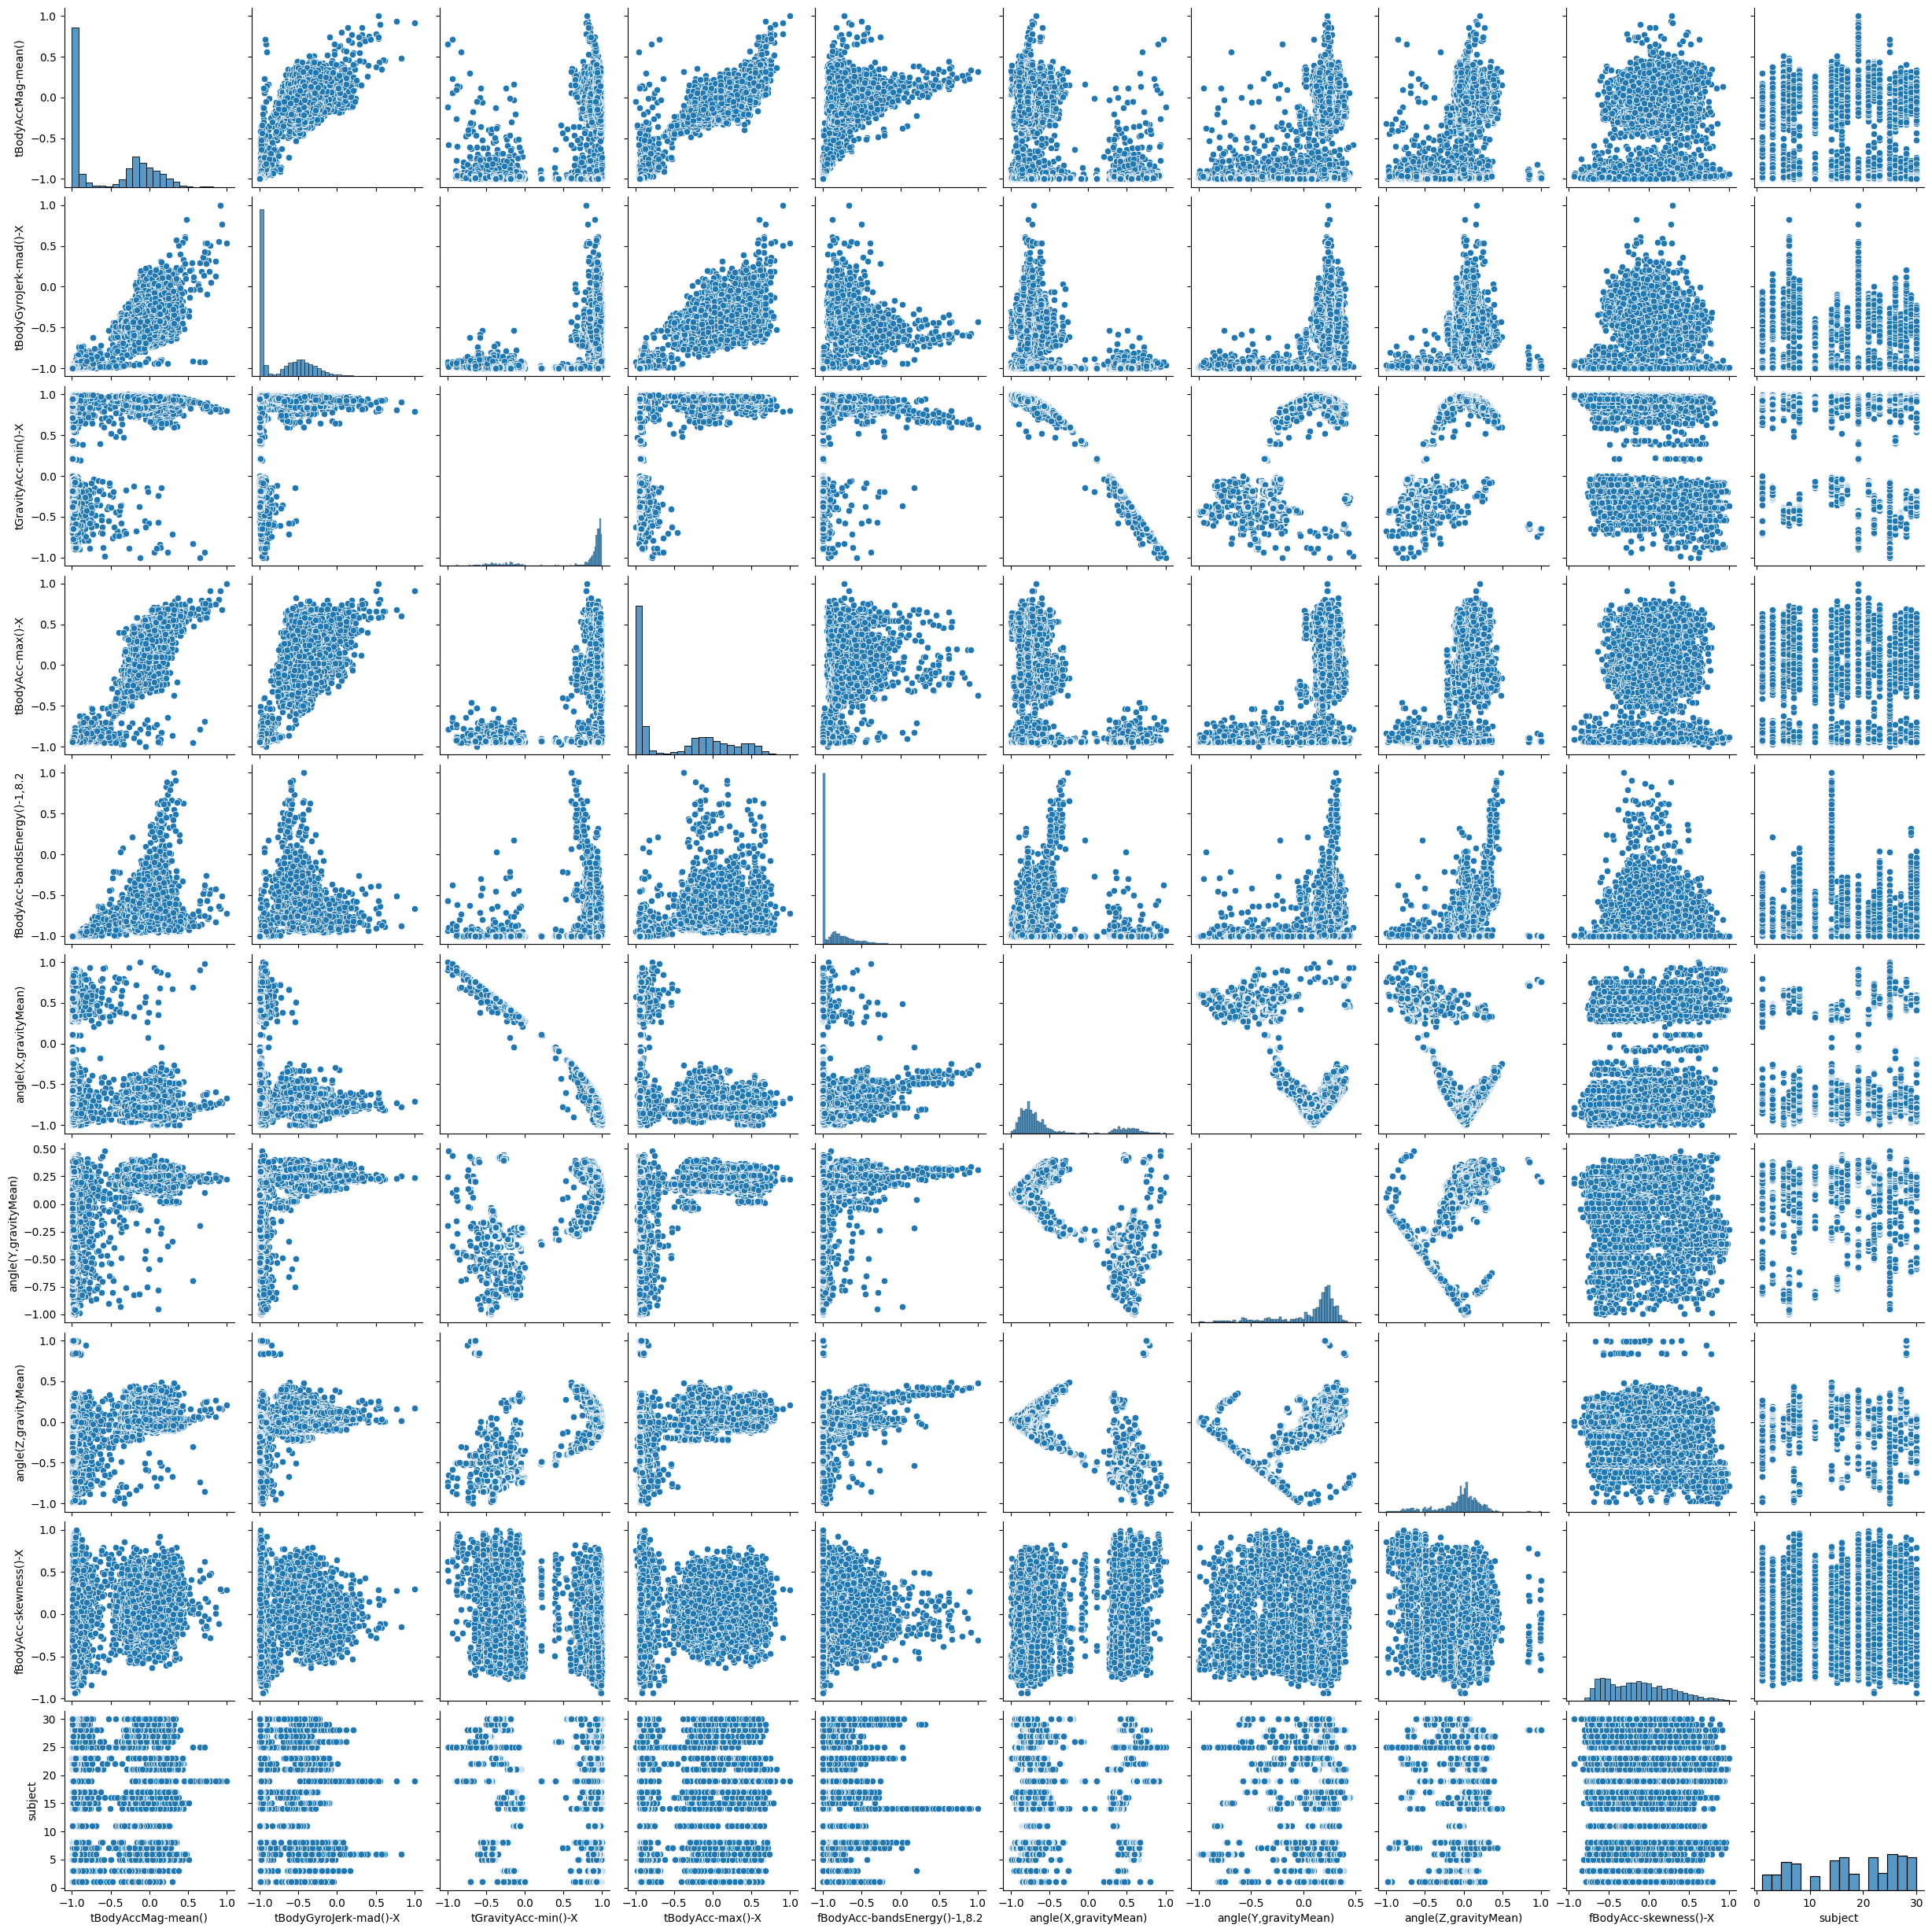

In [829]:
sns.pairplot(train);

На этих графиках видны выбросы, чего не было в таблицах и на графиках ранее. Ещё у тех признаков, которые имеют слабую корреляцию, точки расположены не в определённых зонах, а почти по всему графику.

Анализировать 100 графиков вообще не прикольно... Непонятно, куда смотреть, очень много информации.

### Задание 9 (1 балл)

Окей. Смотреть на все сразу не очень удобно. Кажется, нужно смотреть на признаки в отдельности и искать в них инсайты.

Попробуем проверить гипотезу. Отобразите плотность распределения (kde) `tBodyAccMag-mean()` для каждой из активностей, как в примере ниже. Видите закономерность? Можно ли поделить все активности на две группы? Если да, то проведите вертикальную линию, которая визуально неплохо разделяет эти группы.

Давайте первую группу называть статическими активностями, а вторую - динамическими.

Посчитайте, какую долю правильных ответов дает ваша вертикальная линия для разделения именно этих двух групп. С чем может быть связан полученный вами результат? Предположите логическое обоснование (почему именно данный признак так хорошо/плохо разделяет группы активностей).

Вам может пригодиться:
- sns.kdeplot

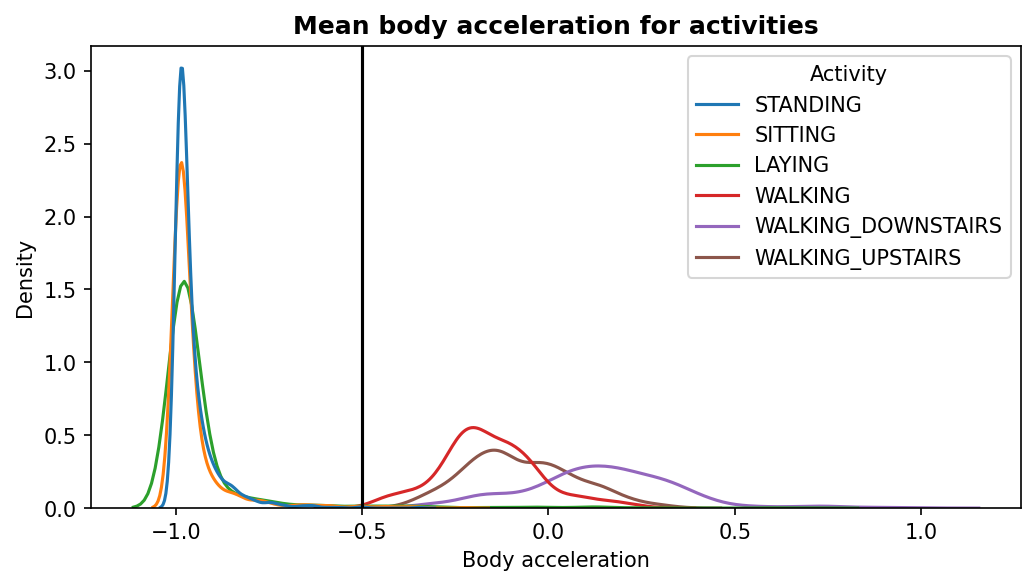

In [830]:
fig, ax = plt.subplots(figsize=(8, 4), dpi=150)
sns.kdeplot(data=train, x="tBodyAccMag-mean()", hue="Activity", legend=True, ax=ax)
plt.title("Mean body acceleration for activities", fontweight="bold")
plt.xlabel("Body acceleration")

divided_line = -0.5
plt.axvline(divided_line, color='black')
plt.show()

In [831]:
wrong_activity = 0

for i in train_activities_frame['Activity']:
    if i in ['WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']:
        wrong_activity += ((train['Activity'] == i) & (train['tBodyAccMag-mean()'] > divided_line)).sum() / len(train['Activity'] == i)
    else:
        wrong_activity += ((train['Activity'] == i) & (train['tBodyAccMag-mean()'] <= divided_line)).sum() / len(train['Activity'] == i)

print(f"Percentage of the correct answers: {wrong_activity * 100:.2f}")

Percentage of the correct answers: 99.22


Доля верных ответов составляет 99%, что очень замечательно. 

Данный признак отлично разделяет активности на 2 группы. Это может быть связано с тем, что, когда человек стоит, сидит или лежит, средние значения ускорения тела примерно равны. А когда движется (ходит, поднимается, спускается) среднее значение ускорения больше, чем у другой группы, но при этом их плотности немного отличаются друг от друга.

### Задание 10 (0.5 балла)

Поздравляем, вы проверили первую гипотезу в процессе EDA. Однако нам бы хотелось уметь не группы разделять, а каждый отдельный вид активности. Попробуйте нарисовать "ящики с усами" для `angle(X,gravityMean)` с разделением по разным видам активности на данных train. Можно ли сделать какой-то вывод по полученной визуализации? Проанализируйте и проинтерпретируйте полученные картинки (если заметили какую-то особенность, может какая-то категория значительно выделяется, то предположите, почему так могло произойти).

Вам может пригодиться:
- sns.boxplot

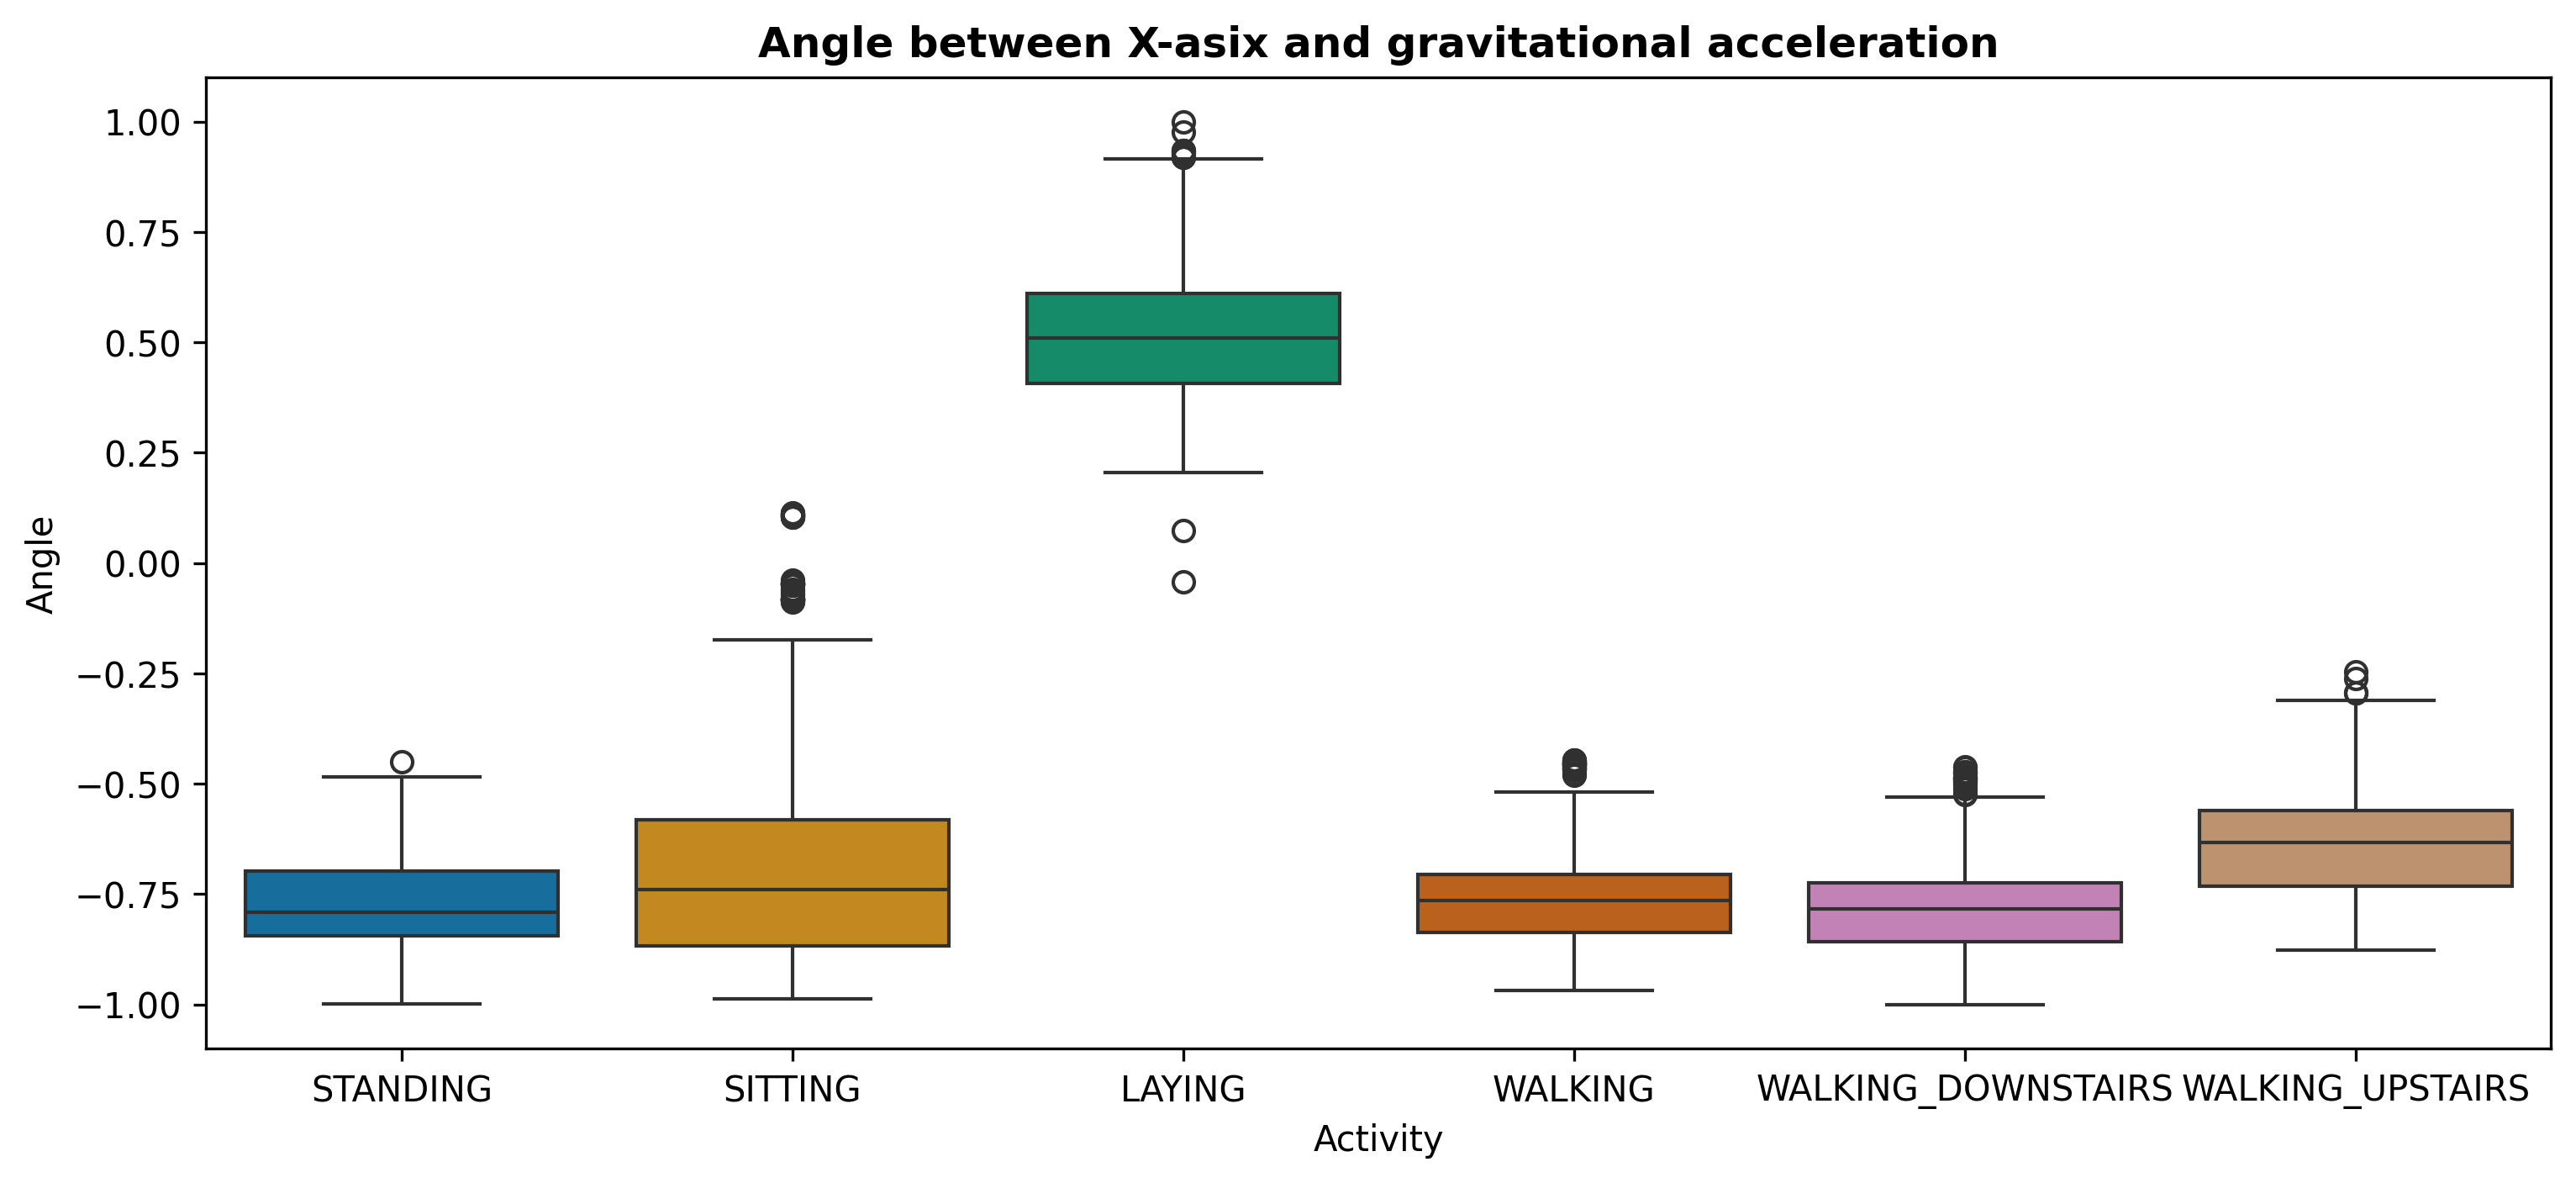

In [832]:
plt.figure(figsize=(12, 5), dpi=300)
sns.boxplot(data=train, y='angle(X,gravityMean)', x='Activity', palette='colorblind')
plt.ylabel('Angle')
plt.title('Angle between X-asix and gravitational acceleration', fontweight='bold')
plt.show()

Значительно выделяется категория `LAYING` из-за того, что когда человек лежит, он находится в горизонатлном положении и угол наклона сильно отличается от "стоячих" активностей. Все остальные активности имеют примерно схожие значения. Поэтому активности можно разделить на 2 группы "стоячие" и "лежащие". 

Также выделяется то, что у `LAYING` и `SITTING` более большие выбросы. Это может быть связано с вариативностью поз при сидении и лежании. Когда человек ходит, у него особо нет вариантов как это делать и угол у всех примерно схожий.

### Задание 11 (0.5 балла)

Посмотрим теперь на `tBodyAcc-max()-X`. Визуализируйте скрипичные диаграммы для этого признака с разделением по активностям на всем train. Кажется логичным, что максимальное ускорение в моменте для разных активностей будет различаться. Однако есть ли активность, которая будет выделяться? Если да, то предложите объяснение, почему эта активность выделяется.

Вам может пригодиться:
- sns.violinplot

In [833]:
plt.figure(figsize=(12, 5))
sns.violinplot(data=train, y='tBodyAcc-max()-X', x='Activity', palette='rocket_r', split=True, inner='quart')
plt.ylabel('Maximal acceleration')
plt.title('Maximal body acceleration over activities', fontweight='bold')
plt.show()

По этому графику активности опять можно разделить на статические и динамические. У первых ускорение низкое, что довольно ожидаемо. Среди динамических выделяется спуск `WALKING_DOWNSTAIRS`, потому что у него макисмальное ускорение выше, чем у остальных. Это может быть связано с тем, что направление ускорения свободного падения сонаправлено с движением человека, и ему легче двигаться, из-за чего скорость становится выше.

### Задание 12 (1 балл)

Вы уже можете с довольно хорошим качеством выделить две категории активности из шести. Продолжим.

Ранее уже упоминалось разделение на две группы активностей: статические и динамические. Пришла пора разделить датасет train на две части. Сделайте это! Теперь на одной картинке покажите распределения `fBodyAcc-bandsEnergy()-1,8.2` для динамичных активностей (`boxenplot` - немного измененый "ящик с усами") и `angle(Y,gravityMean)` для статических - тут хватит и простой гистограммы (прямо, как в примере ниже). Можно ли выделить еще какие-то активности? Если да, напишите, какие активности на 1 и 2 графиках выделяются.

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec (заметили, что один график больше другого? попробуйте сами так сделать - вам понравится...)
- sns.boxenplot
- sns.histplot

In [834]:
dynamic_names = {'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'}
static_names = {'STANDING', 'SITTING', 'LAYING'}

dynamic_activity = train[train['Activity'].isin(dynamic_names)]
static_activity = train[train['Activity'].isin(static_names)]

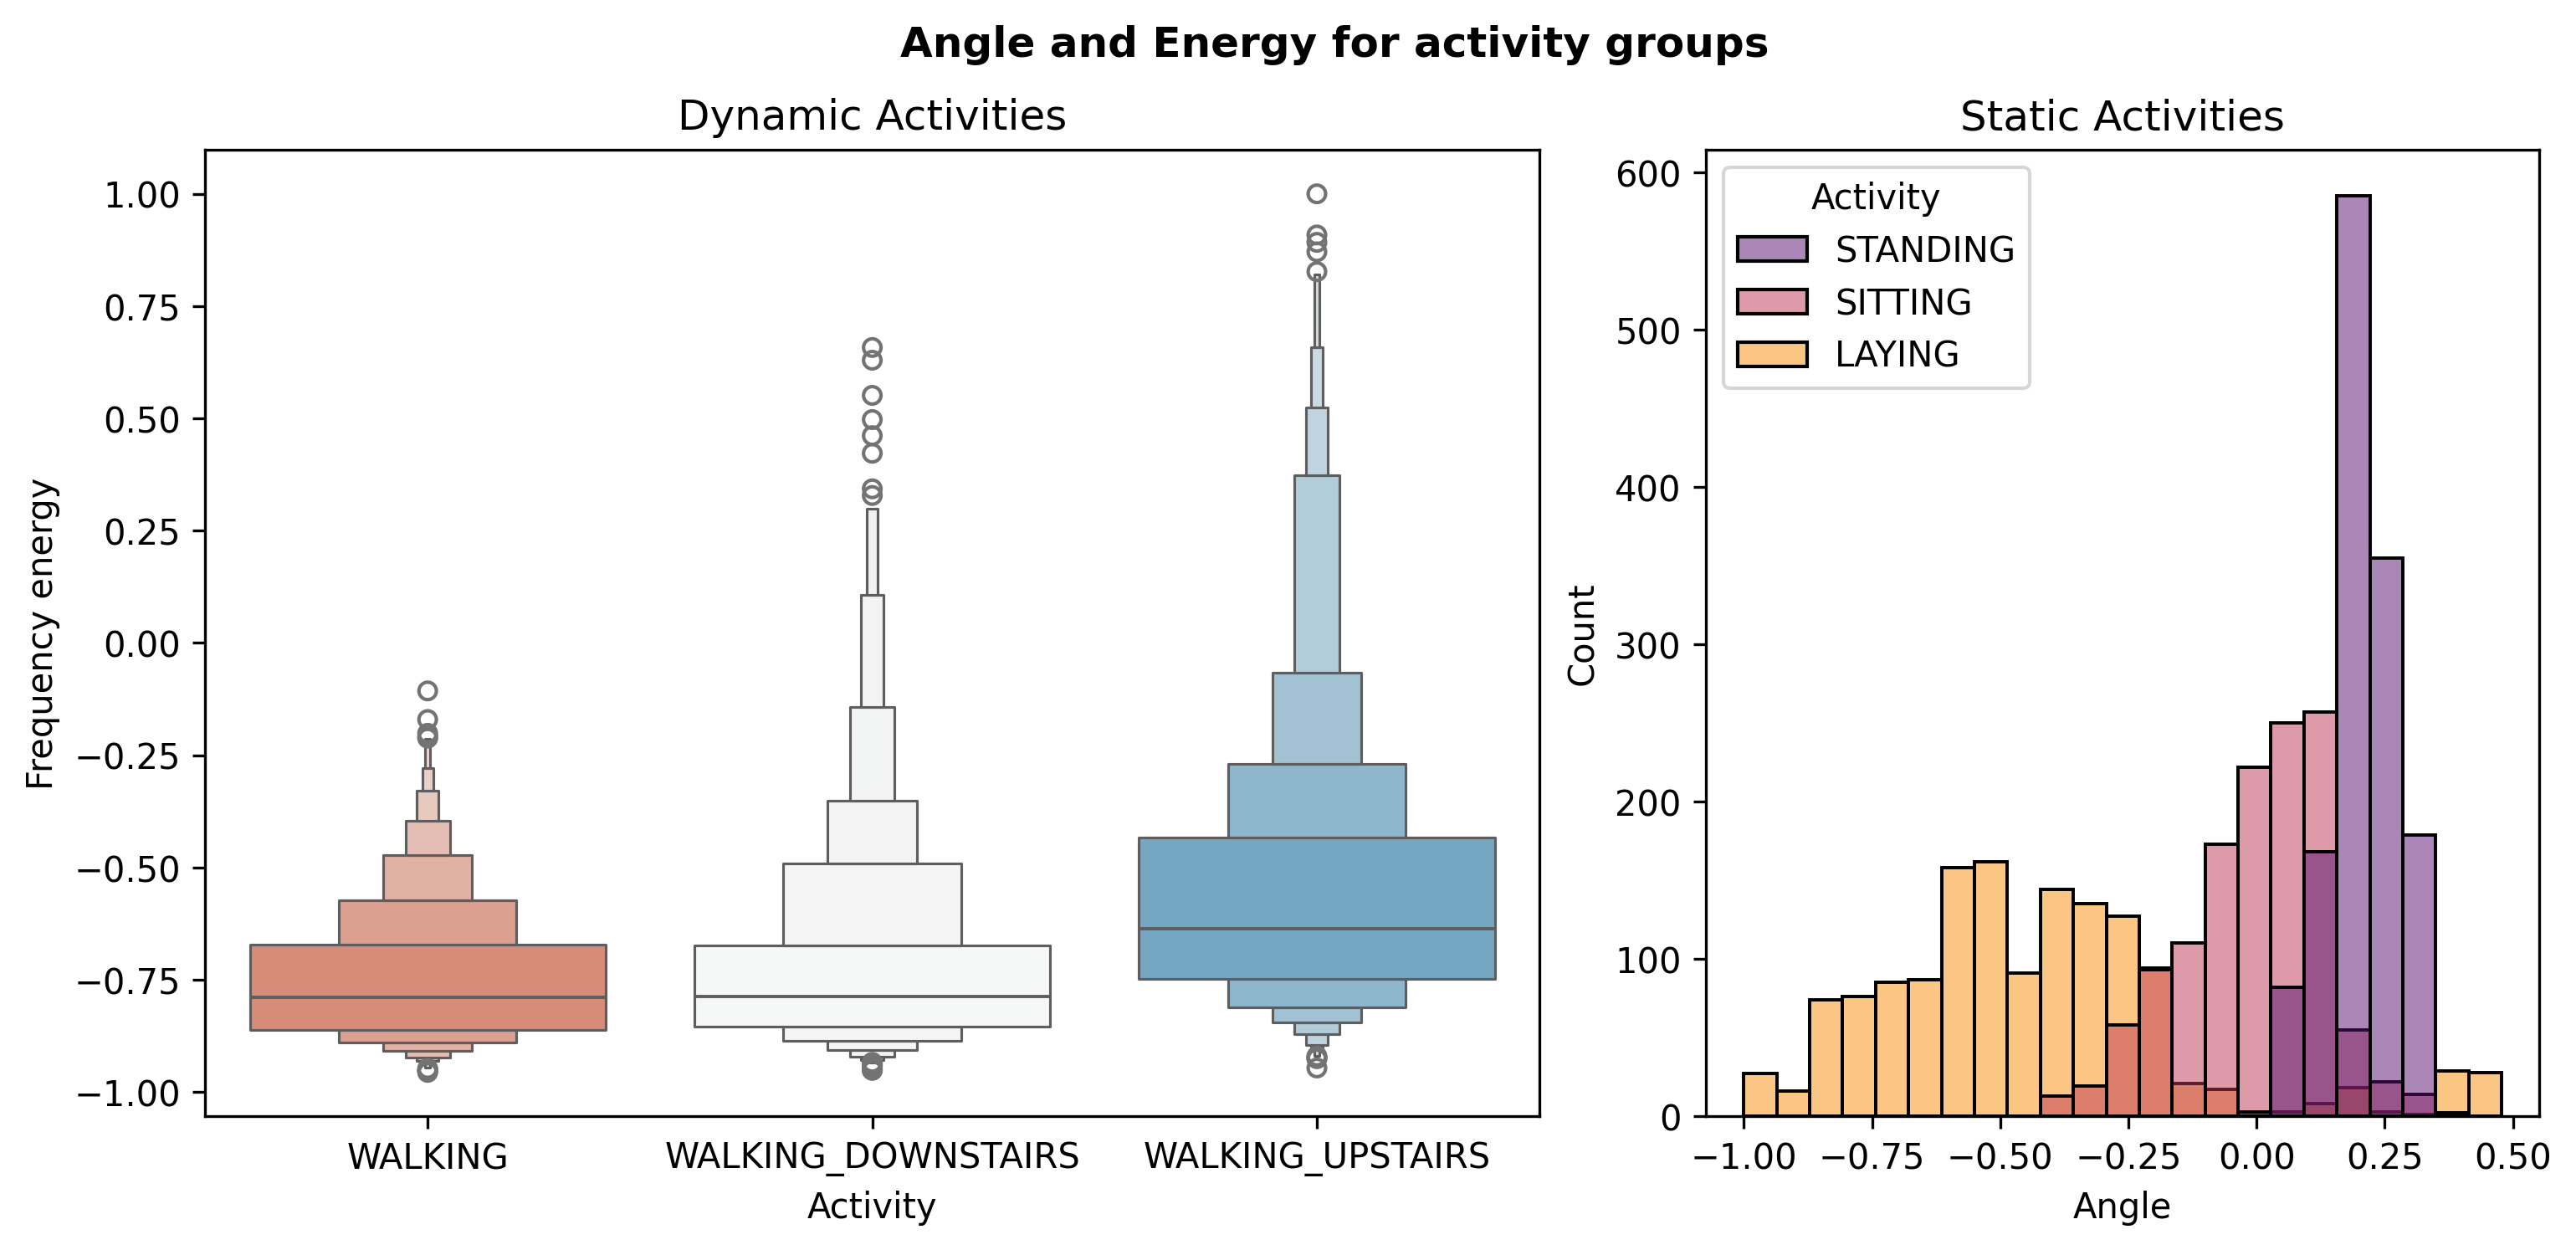

In [835]:
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(1, 5, wspace = 0.5, hspace = 0.5)
plt.figure(figsize=(12, 5), dpi=300)
plt.suptitle('Angle and Energy for activity groups', fontweight='bold')

plt.subplot(gs[0, :3])
sns.boxenplot(data=dynamic_activity, x='Activity', y='fBodyAcc-bandsEnergy()-1,8.2', palette='RdBu')
plt.ylabel('Frequency energy')
plt.title('Dynamic Activities')

plt.subplot(gs[0, 3:])
sns.histplot(data=static_activity, x='angle(Y,gravityMean)', hue='Activity', palette='inferno')
plt.xlabel('Angle')
plt.title('Static Activities')

plt.show()

На первом графике выделяется `WALKING`, потому что его значение энергии не превосходят 0, в отличие от остальных. Также у `WALKING_UPSTAIRS` медианное значение выше, чем у других.

На втором графике можно выделить `STANDING`, потому что у него есть явно выделяющийся пик угла равного около 0.1875.

### Задание 13 (0.5 балла)

Не всегда жизнь будет такой легкой, а данные будут полностью или почти линейно разделимы в одному признаку (иначе чем бы занимались дата саентисты...). Часто данные вообще ни по одному признаку нельзя адекватно разделить (да и по комбинациям признаков тоже). Давайте попробуем взять не один признак, а целых два!

Рассмотрим только статические активности. Будет снова два графика сразу. На первом графике будет боксплот распределения `fBodyAcc-skewness()-X` по активностям. А на втором попробуем взять не все наблюдения данной группы активностей, а только их часть. Разделимы ли категории по `fBodyAcc-skewness()-X`? А если взять только те строки, где `fBodyAcc-skewness()-X < -0.376`, и теперь вывести боксплот распределения `angle(Y,gravityMean)` по разным активностям? Попробуйте и напишите, выделилась ли какая-то категория?

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec
- sns.boxplot

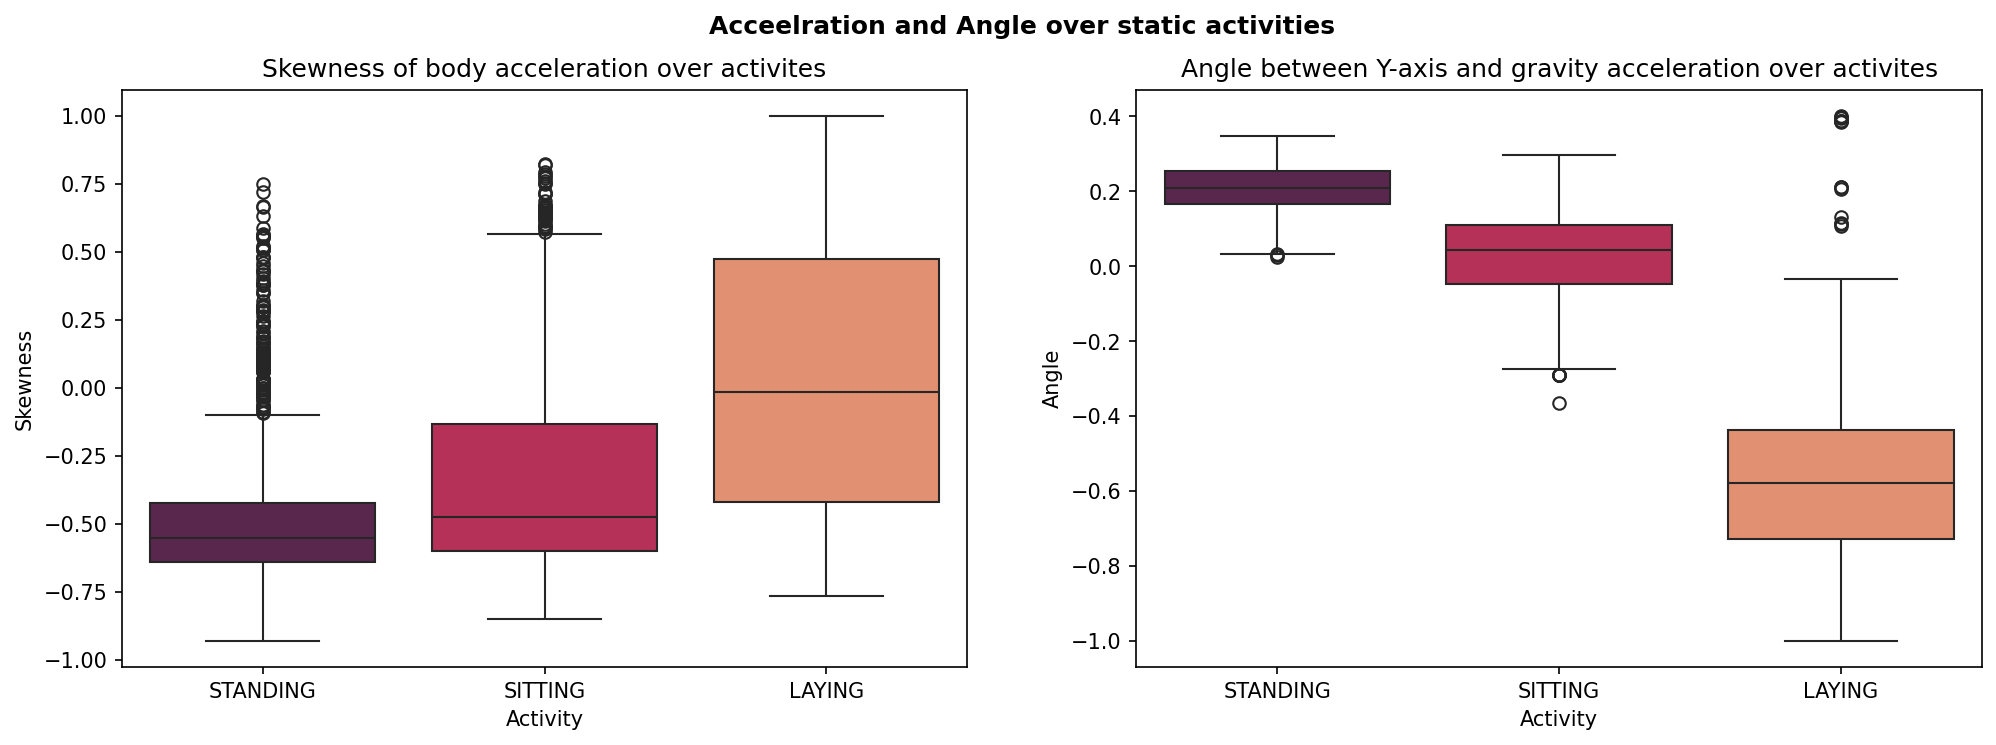

In [836]:
gs = gridspec.GridSpec(1, 4, wspace=0.5, hspace=0.5)
plt.figure(figsize=(16, 5), dpi=150)
plt.suptitle('Acceelration and Angle over static activities', fontweight='bold')

plt.subplot(gs[0, :2])
sns.boxplot(data=static_activity, x='Activity', y='fBodyAcc-skewness()-X', palette='rocket')
plt.title('Skewness of body acceleration over activites')
plt.ylabel('Skewness')

plt.subplot(gs[0, 2:])
sns.boxplot(
    data=static_activity[static_activity['fBodyAcc-skewness()-X'] < -0.376],
    x='Activity', 
    y='angle(Y,gravityMean)', 
    palette='rocket'
)
plt.title('Angle between Y-axis and gravity acceleration over activites')
plt.ylabel('Angle')

plt.show()

На первом графике немного выделяется категория `LAYING`, потому что бОльшая часть её значений ассиметрии больше, чем у других активностей, если не считать выбросы.

На втором графике более явно выделяется `LAYING` из-за того, что большинство значений угла между осью Y и ускорением гравитации значительно больше, чем у других категорий и превосходит 0. 

Поздравляем, теперь вы на шажок ближе к тому, чтобы стать решающим деревом!

### Задание 14 (1 балл)

Вот и осталась лишь одна активность, которую мы никак не выделили. Попробуем и ее какими-то порогами отделить от всех остальных. Да, можно было бы сказать, что, раз уж мы выделили 5 из 6 категорий, то все остальное - это и есть последняя категория, но мы не идем легкими путями. Выделить оставшуюсь категорию с хорошим качеством не так уж и просто. Из доступных признаков, сначала посмотрите на распределение `tBodyAcc-max()-X` на динамических активностях (скрипичная диаграмма отлично подойдет).

А теперь спускаем вам порог `tBodyAcc-max()-X < 0.157`. Для таких строк постройте диаграмму рассеяния для признака `tGravityAcc-min()-X`. Да, получается неидеально, но это честная работа. Можно выбрать порог так, чтобы чисто из таблицы с динамическими активностями из строк, где `tBodyAcc-max()-X < 0.157`, выбрать по некоторому порогу для `tGravityAcc-min()-X` строки так, чтобы доля правильных ответов на оставшейся категории была не меньше 83%!

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec
- sns.violinplot
- sns.swarmplot (иногда лучше подходит, чем просто sns.scatterplot)

Обратите внимание, что подписи к осям можно убирать методами plt. Например, если у вас общее название для оси Y для обоих графиков, то можно не подписывать ось Y у второго графика.

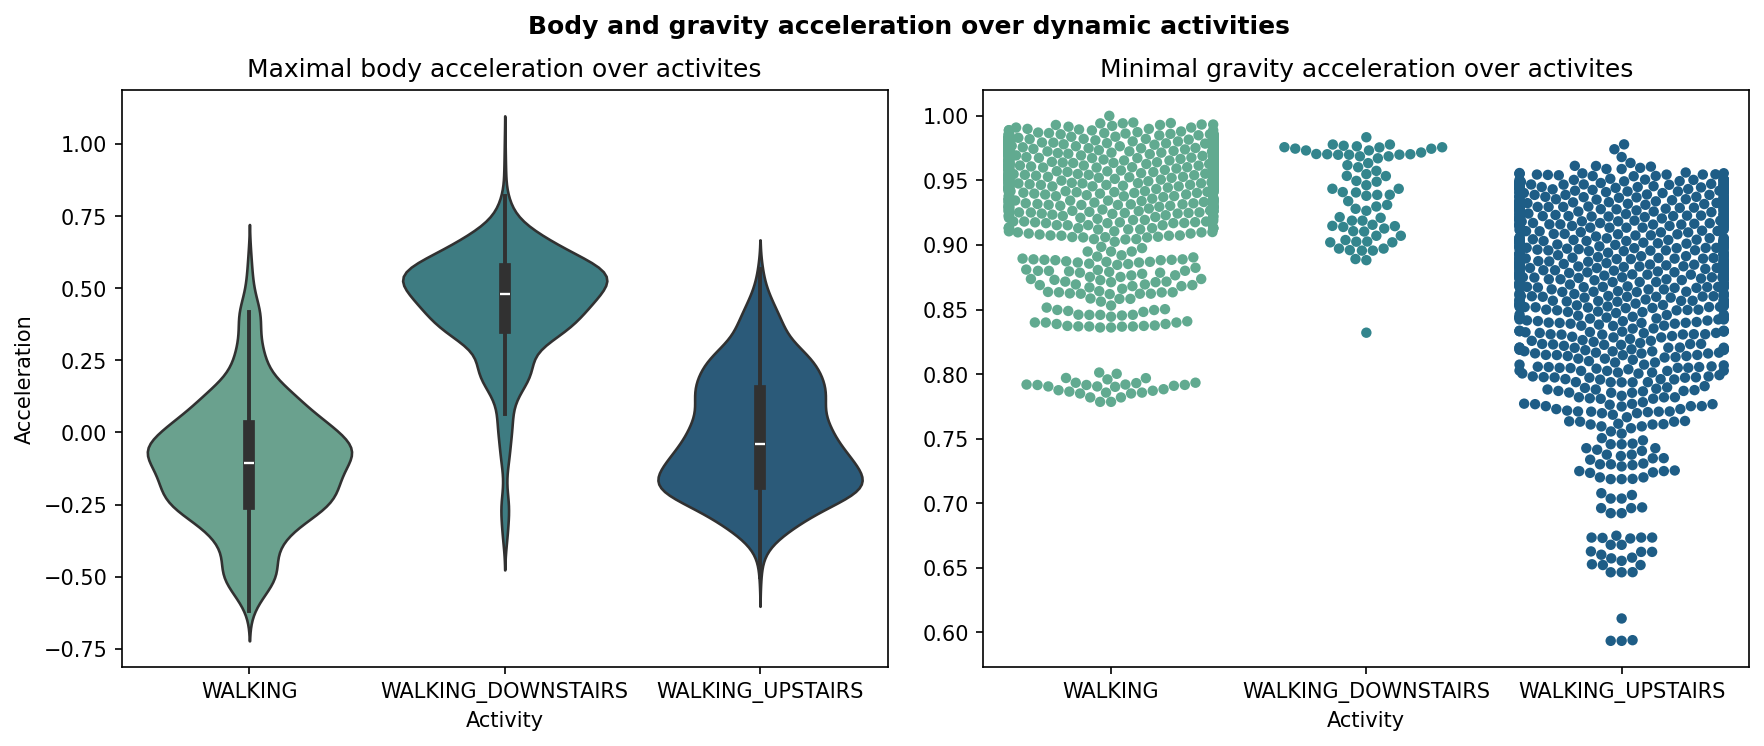

In [837]:
gs = gridspec.GridSpec(1, 6, wspace=0.5, hspace=0.3)
plt.figure(figsize=(14, 5), dpi=150)
plt.suptitle('Body and gravity acceleration over dynamic activities', fontweight='bold')

plt.subplot(gs[0, :3])
sns.violinplot(data=dynamic_activity, x='Activity', y='tBodyAcc-max()-X', palette='crest')
plt.title('Maximal body acceleration over activites')
plt.ylabel('Acceleration')

plt.subplot(gs[0, 3:])
sns.swarmplot(
    data=dynamic_activity[dynamic_activity['tBodyAcc-max()-X'] < 0.157],
    x='Activity', 
    y='tGravityAcc-min()-X', 
    palette='crest'
)
plt.title('Minimal gravity acceleration over activites')
plt.ylabel(None)

plt.show()

Здесь можно выделить, что на первом графике `WALKING_DOWNSTAIRS` выделяется более высокими значениями `tBodyAcc-max()-X`. А на втором - можно отделить некоторую часть у `WALKING_UPSTAIRS` меньше 0.77 и у `WALKING` больше 0.95.

### Задание 15 (0.5 балла)

Теперь попробуем более интерактивные графики. Установите библиотеку `plotly` (обычно `pip install plotly` или `conda install plotly`). Синтаксис очень похож на `seaborn`, но вот [документация для plotly.express](https://plotly.com/python-api-reference/plotly.express.html).

Сначала подготовим данные для визуализации. Будем считать t-SNE просто "черным ящиком", который принимает наши данные и проецирует их в двумерное или трехмерное пространство. Возможно, придется немного подождать.

In [841]:
%%time
from sklearn.manifold import TSNE
tsne = TSNE(random_state=666, n_components=2)
new = tsne.fit_transform(train.drop(['subject', 'Activity'], axis=1))
df_2_comp = pd.concat([
    pd.DataFrame(new, columns=['x', 'y']),
    train['Activity']
], axis=1)

tsne = TSNE(random_state=666, n_components=3)
new = tsne.fit_transform(train.drop(['subject', 'Activity'], axis=1))
df_3_comp = pd.concat([
    pd.DataFrame(new, columns=['x', 'y', 'z']),
    train['Activity']
], axis=1)

CPU times: user 4min 5s, sys: 46.5 s, total: 4min 51s
Wall time: 42.6 s


Теперь нарисуйте scatter-график через `plotly.express` для `df_2_comp` с выделением цветами активностей. Красиво получилось? Видны скопления точек одного цвета? Можно разные активности отделить линиями на данном графике?

In [842]:
import plotly.express as pltexpr

expr = pltexpr.scatter(data_frame=df_2_comp, x='x', y='y', color='Activity', title='Activities with t-SNE')
expr.show()

Красивенько) Да, хорошо видно скоплени точек. Также можно отделить активности на графике линиями, например, на 3 группы: 
1. `LAYING`
2. `SITTING`, `STANDING`
3. Остальные активности

Мы не отстаем от трендов и тоже можем в 3D. Сейчас и вы научитесь (если еще не умеете). Нарисуйте scatter_3d-график через `plotly.express` для `df_3_comp` с выделением цветами активностей. Повращайте его. Нормально получилось? Есть ли какая-то структура у точек?

In [843]:
expr = pltexpr.scatter_3d(data_frame=df_3_comp, x='x', y='y', z='z', color='Activity', title='Activities with t-SNE 3D')
expr.show()

Прикольно. Опять можно выделить 3 группы точек, как и на прошлом графике.

### Задание 16 (1 балл)

Мы сделали вам fit. Ваша очередь сделать predict. Допишите функцию, которая принимает на вход датафрейм с признаками, а выдает вектор из предсказаний - для каждой строки датафрейма вы определяете, к какому классу принадлежит объект. Рекомендуем сразу записывать их строками, а не кодировать в числа. Дальше фукнция `accuracy_score` выдаст вам долю правильных ответов.

Подсказка: вы уже отделили категории друг от друга по каким-то признакам. Воспользуйтесь этим знанием! Используя только проведенный вами анализ можно спокойно выбить не менее 75% на train и test! Если вы получите меньше 75%, то балл будет снижен. Авторское решение (на основе всех графиков выше) выбивает 81% и 77% на train и test соответственно. [Шпаргалка с готовыми идеями для такой задачи](https://rutube.ru/video/f884aa6ed5f94120b7304506042fe5bb/)

In [844]:
def find_activity(obj):
    if obj['tBodyAccMag-mean()'] > -0.5:
        if obj['tBodyAcc-max()-X'] < 0.157 and obj['tGravityAcc-min()-X'] < 0.77:
            return 'WALKING_UPSTAIRS'
        if obj['tBodyAcc-max()-X'] > 0.25:
            return 'WALKING_DOWNSTAIRS'
        if obj['fBodyAcc-bandsEnergy()-1,8.2'] < -0.7:
            return 'WALKING'
        if obj['tBodyAcc-max()-X'] < 0.157 and obj['tGravityAcc-min()-X'] > 0.95:
            return 'WALKING'
        return 'WALKING_UPSTAIRS'
       
    else:
        if obj['angle(X,gravityMean)'] > 0.25:
            return 'LAYING'
        if obj['fBodyAcc-skewness()-X'] < -0.376:
            if obj['angle(Y,gravityMean)'] < -0.4:
                return 'LAYING'
            if obj['angle(Y,gravityMean)'] < 0.1:
                return 'SITTING'
        if obj['angle(Y,gravityMean)'] > 0.15:
            return 'STANDING'
        return 'SITTING'

In [845]:
def predict(df: pd.DataFrame):
    return df.apply(lambda obj: find_activity(obj), axis=1)

def accuracy_score(y_true, y_pred) -> float:
    y_true = np.asarray(y_true).reshape(-1, 1)
    y_pred = np.asarray(y_pred).reshape(-1, 1)
    return (y_true == y_pred).mean()

In [846]:
train_preds = predict(train)
test_preds = predict(test)
print(f"Accuracy on train set => {accuracy_score(train['Activity'], train_preds)}")
print(f"Accuracy on test set => {accuracy_score(test['Activity'], test_preds)}")

Accuracy on train set => 0.8344668117519043
Accuracy on test set => 0.7638276213098066


__Место для мема и/или фидбэка__

![MEME](https://raw.githubusercontent.com/vasyukov1/HSE-FCS-SE-2-year/refs/heads/main/IAD/homeworks/hw03-eda/fml_hw_3_meme.jpeg)